## Imports

In [14]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Settings

In [15]:
imdir = '/home/drevital/obstacles_classification_datasets/rgb_6/eval/obstacle'
imname = '144_1738_.14_2021-08-16--09-53-39_.jpg'
threshold = 55

# Read image & separate it to <ref, current>

In [16]:
imrgb = cv2.imread(os.path.join(imdir, imname))
im = cv2.cvtColor(imrgb, cv2.COLOR_BGR2RGB)        
w = im.shape[1]
ref = im[:, :w//2, 1]
current = im[:, w//2:, 1]

## Generate diff & mask images

In [17]:
diff = cv2.absdiff(current, ref)
_, mask = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

# old morphological operations
copyImg = cv2.erode(mask, np.ones((3, 3), np.uint8), iterations=1)  # reduce noise
copyImg = cv2.dilate(copyImg, np.ones((7, 7), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((5, 5), np.uint8), iterations=1)
copyImg = cv2.dilate(copyImg, np.ones((9, 9), np.uint8), iterations=1)
kernel = np.ones((11, 11), np.uint8)  # kernel for dilation

# increase area to an object
copyImg = cv2.dilate(copyImg, kernel, iterations=2)
copyImg = cv2.dilate(copyImg, np.ones((13, 13), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((11, 11), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((5, 5), np.uint8), iterations=1)

mask = copyImg 

In [21]:
ref.shape, current.shape, mask.shape

((46, 35), (46, 35), (46, 35))

In [22]:
type(ref), type(current), type(mask)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

## Concatenate <ref, current, mask> for training

In [23]:
concat = cv2.hconcat([ref, current, mask])

## Display concatenated image

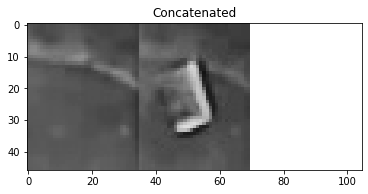

In [13]:
plt.imshow(concat, cmap='gray', vmin=0, vmax=255)
plt.title('Concatenated')
plt.show()